### Dataset information

<div style="display:flex;">
    <img src="https://st3.depositphotos.com/17341700/19368/v/600/depositphotos_193681790-stock-illustration-vector-illustration-design-of-hand.jpg" style="width: 150px; height:150px">
    <img src="https://assembly.kz/upload/iblock/52c/52c9db08c1b8b2faf6a3838a4a63e460.jpg" style="width: 150px; height:150px">
    <img src="http://uchenikspb.ru/kbase/wp-content/uploads/2016/01/akkordeon-hohner.jpg" style="width: 150px; height:150px">
</div>

Our dataset consist images of dombyra, kobyz and accordeon. Each class divided by folders where images from different angles, with different background. Also our dataset has a noise and mislabeled images.<br><br>
<b>Task:</b> Multiclass classification

### Import libraries

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import shutil
import random
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow_hub as hub

### Exploratory data analysis

In [16]:
## don't run
print(f"Dombyra class - {len(os.listdir('dombyra'))} images\nKobyz class - {len(os.listdir('kobyz'))} images\nAccordeon class - {len(os.listdir('accordeon'))} images")

Dombyra class - 390 images
Kobyz class - 309 images
Accordeon class - 367 images


Each class has a mislabeled images, therefore I will clean data manually.

I manually went through all the photos and began to correct mislabeled images, also I created a folder "noise" and sent photos there that are obvious noise.

In [51]:
## don't run
print(f"Dombyra class - {len(os.listdir('dombyra'))} images\nKobyz class - {len(os.listdir('kobyz'))} images\nAccordeon class - {len(os.listdir('accordeon'))} images\nNoise images - {len(os.listdir('noise'))} images")

Dombyra class - 346 images
Kobyz class - 286 images
Accordeon class - 341 images
Noise images - 85 images


After cleaning dataset I've renamed images by classes.

In [16]:
for dirn in os.listdir('.'):
    if dirn == "dombyra":
        for i, filename in enumerate(os.listdir(dirn)):
            os.rename(dirn + "/" + filename, dirn + "/" + "dombyra" + str(i + 1) + ".jpg")
    if dirn == "kobyz":
        for i, filename in enumerate(os.listdir(dirn)):
            os.rename(dirn + "/" + filename, dirn + "/" + "kobyz" + str(i + 1) + ".jpg")
    if dirn == "accordeon":
        for i, filename in enumerate(os.listdir(dirn)):
            os.rename(dirn + "/" + filename, dirn + "/" + "accordeon" + str(i + 1) + ".jpg")
        

Let's look to our images

In [2]:
def img_show(folder):
    plt.subplot(1,3,1)
    plt.imshow(plt.imread(f'{folder}/{random.choice(os.listdir(folder))}'))
    plt.subplot(1,3,2)
    plt.imshow(plt.imread(f'{folder}/{random.choice(os.listdir(folder))}'))
    plt.subplot(1,3,3)
    plt.imshow(plt.imread(f'{folder}/{random.choice(os.listdir(folder))}'))

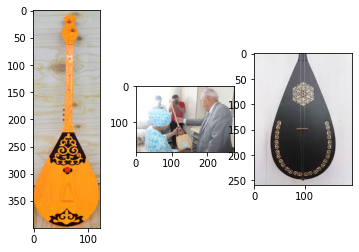

In [5]:
img_show('dombyra')

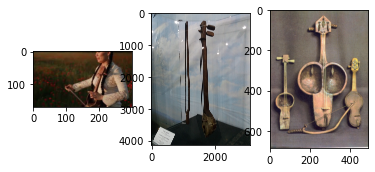

In [6]:
img_show('kobyz')

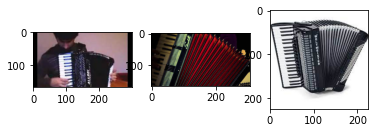

In [7]:
img_show('accordeon')

Now we can analyze our data.

In [77]:
def math_count(folder):
    print(f"{folder} class:")
    shapes = []
    for i, dirn in enumerate(os.listdir(folder)):
        print(f"#{i + 1} image:", end=" ")
        first = plt.imread(f'{folder}/{dirn}')
        print(f"Shape - {np.shape(first)}", end=" ")
        shapes.append(np.shape(first))
        print(f"Mean - {np.mean(first)}", end=" ")
        print(f"Std - {np.std(first)}")
    print(f"Smallest image - {min(shapes)}")
    print(f"Biggest image - {max(shapes)}")

In [78]:
math_count("dombyra")

dombyra class:
#1 image: Shape - (1422, 800, 3) Mean - 127.52031411157994 Std - 50.740832013499684
#2 image: Shape - (1280, 1280, 3) Mean - 248.0431864420573 Std - 31.55838488029505
#3 image: Shape - (168, 300, 3) Mean - 79.54828042328042 Std - 95.45895034383503
#4 image: Shape - (199, 253, 3) Mean - 152.6306565766911 Std - 73.5178326822762
#5 image: Shape - (194, 259, 3) Mean - 99.11162414255197 Std - 46.8156319128079
#6 image: Shape - (181, 279, 3) Mean - 105.65525389941715 Std - 55.128778379287326
#7 image: Shape - (169, 299, 3) Mean - 77.88019895377755 Std - 49.201739474914184
#8 image: Shape - (100, 100, 3) Mean - 144.3094 Std - 67.4811924783985
#9 image: Shape - (259, 194, 3) Mean - 127.25916490864944 Std - 54.91302205912119
#10 image: Shape - (165, 306, 3) Mean - 89.94363240245593 Std - 57.31580592751272
#11 image: Shape - (183, 275, 3) Mean - 121.93445272396092 Std - 79.87213806520298
#12 image: Shape - (237, 213, 3) Mean - 145.13844812899902 Std - 71.494696943106
#13 image: Sh

#106 image: Shape - (168, 300, 3) Mean - 124.92939814814815 Std - 61.73209191972942
#107 image: Shape - (370, 136, 3) Mean - 156.33994435612084 Std - 59.251772356570825
#108 image: Shape - (168, 300, 3) Mean - 145.59397486772488 Std - 62.28026891590517
#109 image: Shape - (224, 224, 3) Mean - 244.00228528911563 Std - 36.39023711137854
#110 image: Shape - (225, 225, 3) Mean - 213.78203127572016 Std - 55.46912294913583
#111 image: Shape - (168, 300, 3) Mean - 80.03087962962962 Std - 50.451892116565816
#112 image: Shape - (450, 760, 3) Mean - 245.0307738791423 Std - 36.68925415850197
#113 image: Shape - (305, 660, 3) Mean - 218.96042887895348 Std - 47.07568070819186
#114 image: Shape - (259, 194, 3) Mean - 202.20307420822886 Std - 36.09885287534514
#115 image: Shape - (264, 191, 3) Mean - 228.0651607700037 Std - 50.61033101258226
#116 image: Shape - (294, 171, 3) Mean - 122.38647544787895 Std - 79.42437182553964
#117 image: Shape - (299, 168, 3) Mean - 147.0285342676647 Std - 71.022076525

#221 image: Shape - (720, 960, 3) Mean - 163.51873746141976 Std - 60.81627210322977
#222 image: Shape - (720, 960, 3) Mean - 151.19848283179013 Std - 77.58916351873958
#223 image: Shape - (450, 760, 3) Mean - 164.81484210526315 Std - 71.90054012154842
#224 image: Shape - (400, 620, 3) Mean - 109.07556586021505 Std - 67.95657346545926
#225 image: Shape - (720, 960, 3) Mean - 153.52183834876544 Std - 62.10764751585593
#226 image: Shape - (2560, 1209, 3) Mean - 111.8724581911704 Std - 56.817776598503436
#227 image: Shape - (350, 500, 3) Mean - 155.59193714285715 Std - 71.58466455177629
#228 image: Shape - (3400, 2000, 4) Mean - 176.26506044117647 Std - 106.65123727712653
#229 image: Shape - (720, 1280, 3) Mean - 107.75415147569444 Std - 89.58746460788382
#230 image: Shape - (720, 1280, 3) Mean - 79.33597620081018 Std - 95.73479687068013
#231 image: Shape - (440, 800, 3) Mean - 175.1174412878788 Std - 51.803698416861245
#232 image: Shape - (640, 640, 3) Mean - 237.752822265625 Std - 30.096

In [79]:
math_count("kobyz")

kobyz class:
#1 image: Shape - (780, 600, 4) Mean - 184.0994513888889 Std - 105.41191151694527
#2 image: Shape - (400, 288, 3) Mean - 146.37847222222223 Std - 88.77734440894695
#3 image: Shape - (275, 183, 3) Mean - 230.59635701275045 Std - 50.3473034238745
#4 image: Shape - (270, 186, 3) Mean - 100.91176821983274 Std - 18.37692224791452
#5 image: Shape - (168, 300, 3) Mean - 53.55642857142857 Std - 46.11433861467858
#6 image: Shape - (300, 168, 3) Mean - 126.83298941798942 Std - 61.5302341396943
#7 image: Shape - (195, 259, 3) Mean - 235.6789030789031 Std - 59.80907060802142
#8 image: Shape - (225, 225, 3) Mean - 49.15173004115226 Std - 64.21865147233048
#9 image: Shape - (240, 210, 3) Mean - 97.03612433862433 Std - 59.80662028532288
#10 image: Shape - (259, 194, 3) Mean - 189.74919396568882 Std - 70.76111353269475
#11 image: Shape - (162, 311, 3) Mean - 196.17884032657165 Std - 75.87644524804365
#12 image: Shape - (224, 224, 3) Mean - 237.67635921556123 Std - 48.285216797057274
#13 i

#127 image: Shape - (225, 225, 3) Mean - 120.1857316872428 Std - 43.01476112840532
#128 image: Shape - (183, 275, 3) Mean - 218.99867527736382 Std - 56.646701473076085
#129 image: Shape - (194, 259, 3) Mean - 209.29474319680506 Std - 63.65743055488234
#130 image: Shape - (212, 238, 3) Mean - 124.25243776755985 Std - 44.81631696898402
#131 image: Shape - (189, 267, 3) Mean - 243.02441392703565 Std - 37.441303965019955
#132 image: Shape - (275, 183, 3) Mean - 109.861811558205 Std - 74.31136670494499
#133 image: Shape - (271, 186, 3) Mean - 96.87020063749024 Std - 70.73912380517505
#134 image: Shape - (251, 201, 3) Mean - 120.45762555086453 Std - 76.40558491553553
#135 image: Shape - (667, 1000, 3) Mean - 136.4603323338331 Std - 55.899308397777375
#136 image: Shape - (282, 179, 3) Mean - 120.65375675211644 Std - 70.00348914775711
#137 image: Shape - (168, 299, 3) Mean - 174.90980517067473 Std - 91.63600973087017
#138 image: Shape - (183, 275, 3) Mean - 147.19356184798806 Std - 49.32495132

#230 image: Shape - (721, 1280, 3) Mean - 146.08122832871013 Std - 54.20162952321871
#231 image: Shape - (694, 800, 3) Mean - 113.16800612391931 Std - 64.31851096187246
#232 image: Shape - (768, 552, 3) Mean - 243.41297585799114 Std - 37.338211155205705
#233 image: Shape - (640, 360, 3) Mean - 126.84214265046296 Std - 61.932515765214845
#234 image: Shape - (194, 195, 3) Mean - 216.15003083972155 Std - 68.2506825243207
#235 image: Shape - (217, 164, 3) Mean - 177.39571391105616 Std - 94.77641520842565
#236 image: Shape - (194, 259, 3) Mean - 147.9619140495429 Std - 63.860313253082694
#237 image: Shape - (330, 400, 4) Mean - 220.21083901515152 Std - 69.79949004231524
#238 image: Shape - (608, 912, 3) Mean - 196.84894330467066 Std - 59.55171316215563
#239 image: Shape - (229, 220, 3) Mean - 170.88482201931984 Std - 56.85771034575952
#240 image: Shape - (259, 194, 3) Mean - 140.020512412265 Std - 44.55852075551466
#241 image: Shape - (600, 450, 3) Mean - 111.57596049382715 Std - 67.5717304

In [80]:
math_count("accordeon")

accordeon class:
#1 image: Shape - (1500, 1500, 3) Mean - 195.9545688888889 Std - 88.45929031133201
#2 image: Shape - (450, 800, 3) Mean - 138.38325833333334 Std - 60.04047166745054
#3 image: Shape - (194, 260, 3) Mean - 104.35284826856991 Std - 65.58828023697174
#4 image: Shape - (225, 225, 3) Mean - 183.4002172839506 Std - 84.85479876258742
#5 image: Shape - (172, 293, 3) Mean - 86.03177500859857 Std - 71.22659738612235
#6 image: Shape - (225, 225, 3) Mean - 131.1416230452675 Std - 85.25288247852146
#7 image: Shape - (194, 259, 3) Mean - 122.21662752590588 Std - 68.5168703237277
#8 image: Shape - (225, 225, 3) Mean - 170.66586995884774 Std - 89.04616930686414
#9 image: Shape - (224, 225, 3) Mean - 210.1945701058201 Std - 85.17148422921404
#10 image: Shape - (164, 308, 3) Mean - 37.152109069792 Std - 47.41139811027423
#11 image: Shape - (168, 300, 3) Mean - 55.63440476190476 Std - 53.95941624986916
#12 image: Shape - (100, 100, 3) Mean - 132.1135 Std - 89.98094400714334
#13 image: Sha

#105 image: Shape - (199, 254, 3) Mean - 187.89314024189187 Std - 91.3326668056278
#106 image: Shape - (165, 306, 3) Mean - 114.58364692678418 Std - 78.58728314922445
#107 image: Shape - (100, 100, 3) Mean - 128.68143333333333 Std - 89.17101032255694
#108 image: Shape - (232, 217, 3) Mean - 179.6119365432491 Std - 85.15207866135502
#109 image: Shape - (194, 259, 3) Mean - 87.2671191073253 Std - 65.59836542859529
#110 image: Shape - (210, 240, 3) Mean - 80.84351851851852 Std - 90.43215000367233
#111 image: Shape - (194, 259, 3) Mean - 141.6866417227242 Std - 82.21120773979594
#112 image: Shape - (480, 660, 3) Mean - 142.6975242003367 Std - 78.38623800032424
#113 image: Shape - (350, 248, 3) Mean - 98.4944930875576 Std - 61.83156733651421
#114 image: Shape - (173, 292, 3) Mean - 177.70021379364954 Std - 97.67026372541467
#115 image: Shape - (168, 300, 3) Mean - 138.864623015873 Std - 58.453634565967235
#116 image: Shape - (132, 382, 3) Mean - 196.37367126765034 Std - 68.69793952694504
#1

#214 image: Shape - (225, 225, 3) Mean - 177.90151769547325 Std - 101.96563933472589
#215 image: Shape - (180, 279, 3) Mean - 190.884149741139 Std - 79.56106019204451
#216 image: Shape - (239, 211, 3) Mean - 97.15577015870498 Std - 70.44852724118174
#217 image: Shape - (768, 1024, 3) Mean - 41.3935792711046 Std - 59.6514719296457
#218 image: Shape - (962, 900, 3) Mean - 179.79358512358513 Std - 87.12986720559807
#219 image: Shape - (670, 1005, 3) Mean - 187.95802430632907 Std - 90.22135420735239
#220 image: Shape - (600, 600, 4) Mean - 208.52020972222223 Std - 79.58904713282828
#221 image: Shape - (600, 600, 4) Mean - 191.80972916666667 Std - 85.58643431453758
#222 image: Shape - (271, 186, 3) Mean - 138.402544670608 Std - 75.67564609328588
#223 image: Shape - (450, 760, 3) Mean - 160.92340545808966 Std - 102.00610829444241
#224 image: Shape - (209, 241, 3) Mean - 183.8358977413356 Std - 95.12877020693763
#225 image: Shape - (225, 225, 3) Mean - 205.9227522633745 Std - 90.5813363793938

#318 image: Shape - (173, 292, 3) Mean - 115.55184496001267 Std - 88.99055196537141
#319 image: Shape - (225, 225, 3) Mean - 191.3856790123457 Std - 88.27861400818212
#320 image: Shape - (450, 800, 3) Mean - 151.90295 Std - 76.26224678699941
#321 image: Shape - (159, 318, 3) Mean - 67.7456587951426 Std - 71.81964255800523
#322 image: Shape - (193, 262, 3) Mean - 170.07913749686878 Std - 102.52158614142932
#323 image: Shape - (200, 200, 3) Mean - 191.73985833333333 Std - 86.38127701058795
#324 image: Shape - (250, 201, 3) Mean - 120.49819568822554 Std - 70.78753125016004
#325 image: Shape - (194, 259, 3) Mean - 95.03121973225066 Std - 73.080829635262
#326 image: Shape - (3240, 4472, 3) Mean - 139.54986120773427 Std - 106.13725544918245
#327 image: Shape - (225, 225, 3) Mean - 232.36622222222223 Std - 42.243185495297624
#328 image: Shape - (1030, 1500, 3) Mean - 132.05347378640778 Std - 105.55781819856412
#329 image: Shape - (200, 200, 3) Mean - 198.445025 Std - 86.68947289655596
#330 im

As we can see 'kobyz' and 'accordeon' classes has very smallest images. There's a possibility that this images is noise, therefore I again go through all images. After that we get:

In [8]:
## don't run
print(f"Dombyra class - {len(os.listdir('dombyra'))} images\nKobyz class - {len(os.listdir('kobyz'))} images\nAccordeon class - {len(os.listdir('accordeon'))} images\nNoise images - {len(os.listdir('noise'))} images")

Dombyra class - 243 images
Kobyz class - 242 images
Accordeon class - 315 images
Noise images - 257 images


Also we see that distribution of image heights and widths are different, so I'll visualize it for each class.

In [69]:
def show_distrib(title):
    info_dict = {}
    heights = []
    widths = []
    for i, dirn in enumerate(os.listdir(title)):
        first = plt.imread(f'{title}/{dirn}')
        heights.append(np.shape(first)[0])
        widths.append(np.shape(first)[1])
    info_dict['min_w'] = min(widths)
    info_dict['max_w'] = max(widths)
    info_dict['min_h'] = min(heights)
    info_dict['max_h'] = max(heights)
    info_dict['mean_w'] = np.mean(widths)
    info_dict['mean_h'] = np.mean(heights)
    
    plt.figure('dimension plot', figsize=(8, 6))

    plt.axhline(y=info_dict['min_h'], color='orange', linestyle='--', linewidth=1)
    plt.axhline(y=info_dict['max_h'], color='orange', linestyle='--', linewidth=1)
    plt.axvline(x=info_dict['min_w'], color='orange', linestyle='--', linewidth=1)
    plt.axvline(x=info_dict['max_w'], color='orange', linestyle='--', linewidth=1)
    
    plt.fill_between([info_dict['min_w'], info_dict['max_w']], info_dict['min_h'], info_dict['max_h'],
                         facecolor='orange', alpha=0.1)

    plt.scatter(widths, heights, s=7, c='green')
    plt.scatter(info_dict['mean_w'], info_dict['mean_h'], s=15, c='blue')
    plt.text(info_dict['mean_w'], info_dict['mean_h'], 'mean', color='b', ha='right', va='bottom', fontsize=10)

    plt.xlabel('width')
    plt.ylabel('height')

    plt.title('height/width scatter plot', pad=30)


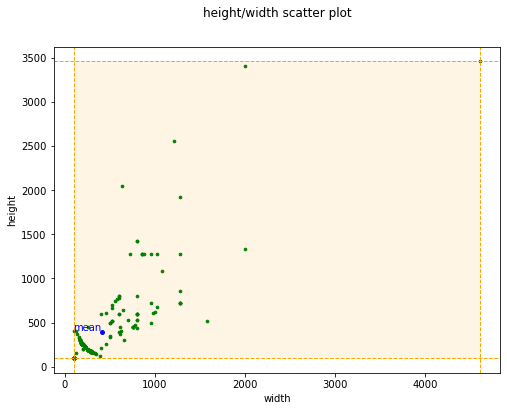

In [70]:
show_distrib("dombyra")

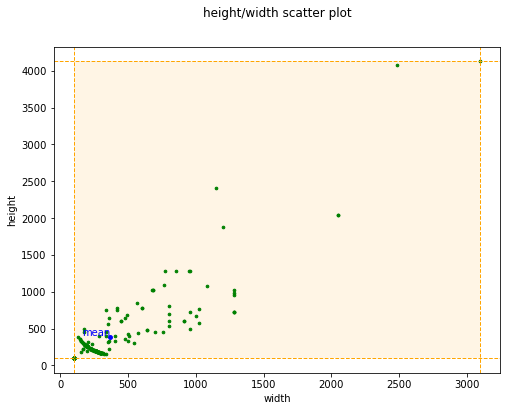

In [71]:
show_distrib("kobyz")

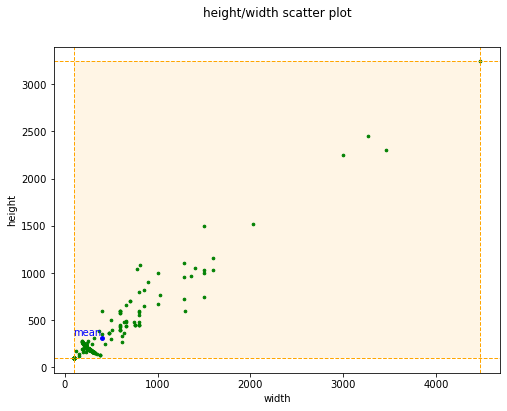

In [72]:
show_distrib("accordeon")

According to the graphs, the distributions is almost the same.

Get the list of images from folders:

In [9]:
dombyra_imgs = os.listdir('dombyra')
kobyz_imgs = os.listdir('kobyz')
accordeon_imgs = os.listdir('accordeon')

I want to get NxM matrix where N is the number of images and M is the number of pixels.

In [10]:
def img2np(path, list_of_filename, size = (64, 64)):
    for fn in list_of_filename:
        file_path = path + fn
        current_image = image.load_img(file_path, target_size = size, 
                                       color_mode = 'grayscale')
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

dombyra_images = img2np('dombyra/', dombyra_imgs)
kobyz_images = img2np('kobyz/', kobyz_imgs)
accordeon_images = img2np('accordeon/', accordeon_imgs)

print(f"Dombyra class - {dombyra_images.shape}\nKobyz class - {kobyz_images.shape}\nAccordeon class - {accordeon_images.shape}")

Dombyra class - (243, 4096)
Kobyz class - (242, 4096)
Accordeon class - (315, 4096)


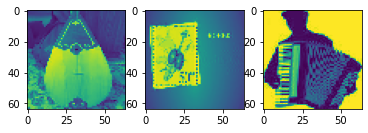

In [11]:
plt.subplot(1,3,1)
plt.imshow(dombyra_images[random.randint(0, len(dombyra_images))].reshape(64, 64))
plt.subplot(1,3,2)
plt.imshow(kobyz_images[random.randint(0, len(kobyz_images))].reshape(64, 64))
plt.subplot(1,3,3)
plt.imshow(accordeon_images[random.randint(0, len(accordeon_images))].reshape(64, 64))
plt.show()

Now after getting vector of images I want to see how looks average image of each class.

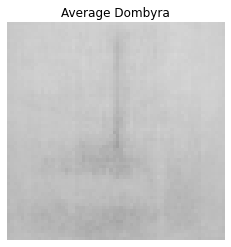

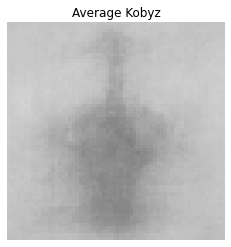

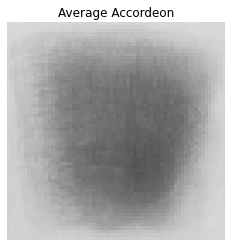

In [12]:
def find_mean_img(full_mat, title, size = (64, 64)):
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis(False)
    plt.show()
    return mean_img

dombyra_mean = find_mean_img(dombyra_images, 'Dombyra')
kobyz_mean = find_mean_img(kobyz_images, 'Kobyz')
accordeon_mean = find_mean_img(accordeon_images, 'Accordeon')

According to the average images we can see that 'Dombyra' class the most illegible. There's a possibility that disribution still has a noise. Let's see to color tones of each class images.

In [25]:
def draw_hist(images, title=""):
    plt.hist(images)
    plt.title(f"{title} images tones")
    plt.show()

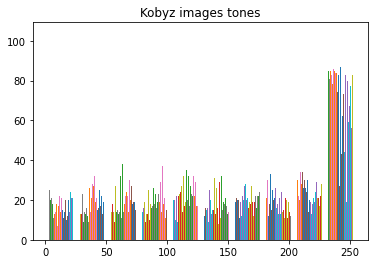

In [26]:
draw_hist(kobyz_images, "Kobyz")

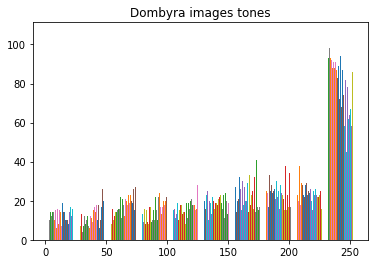

In [27]:
draw_hist(dombyra_images, "Dombyra")

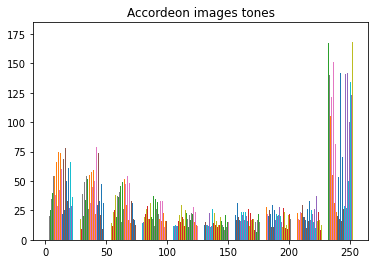

In [28]:
draw_hist(accordeon_images, "Accordeon")

Histograms shows that "Dombyra" and "Kobyz" classes has more dark tones, meanwhile "Accordeon" class has some light tones. It might be cause of background of Accordeon images. This can work against me, as there is a possibility that the model will not predict correctly the accordion if its tones are dark.

### Preprocessing 

Now after analyzing my data, I'll divide them to train, dev and test. But before I do this, I will do Data Augmentation. Let's see how many images we have before Data Augmentation.

In [74]:
## don't run
print(f"Dombyra class - {len(os.listdir('dombyra'))} images\nKobyz class - {len(os.listdir('kobyz'))} images\nAccordeon class - {len(os.listdir('accordeon'))} images")

Dombyra class - 189 images
Kobyz class - 207 images
Accordeon class - 301 images


In [90]:
datagen = ImageDataGenerator(
    rotation_range=40,
    horizontal_flip=True,
    shear_range=0.0,
    zoom_range=0.0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=[0.3,0.9],
    fill_mode='nearest'
)

In [121]:
def data_aug(path, list_of_filename, save_to, aug_n=5):
    for fn in tqdm(list_of_filename):
        file_path = path + fn
        img = image.load_img(file_path)
        x = image.img_to_array(img)
        x = x.reshape((1,) + x.shape)
        i = 0
        for d in datagen.flow(x, batch_size=1, save_to_dir=save_to, save_prefix=f'{save_to}_augmented', save_format='jpg'):
            i += 1
            if i == aug_n:
                break

In [103]:
data_aug('dombyra/', os.listdir('dombyra'), 'dombyra', 6)

100%|██████████████████████████████████████████████████████████████████████████████| 191/191 [03:04<00:00,  1.04it/s]


In [105]:
data_aug('kobyz/', os.listdir('kobyz'), 'kobyz', 6)

100%|██████████████████████████████████████████████████████████████████████████████| 205/205 [02:42<00:00,  1.26it/s]


In [112]:
data_aug('accordeon/', os.listdir('accordeon'), 'accordeon', 4)

100%|██████████████████████████████████████████████████████████████████████████████| 301/301 [02:27<00:00,  2.03it/s]


After augmentation I have:

In [163]:
## don't run
print(f"Dombyra class - {len(os.listdir('dombyra'))} images\nKobyz class - {len(os.listdir('kobyz'))} images\nAccordeon class - {len(os.listdir('accordeon'))} images")

Dombyra class - 1281 images
Kobyz class - 1354 images
Accordeon class - 1438 images


Now I'll divide my data to train, dev, test. Firstly I'll divide by 90-5-5 partion.

In [142]:
def split_data(folder, val_ratio=0.05, test_ratio=0.05):    
    classes = ['dombyra', 'kobyz', 'accordeon']
    for c in classes:
        allFn = os.listdir(c)
        np.random.shuffle(allFn)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFn),
        [int(len(allFn)* (1 - (val_ratio + test_ratio))), int(len(allFn)* (1 - test_ratio))])
        
        for name in train_FileNames:
            shutil.copy(c + '/' + name, folder + '/train/' + c)
            
        for name in val_FileNames:
            shutil.copy(c + '/' + name, folder + '/validation/' + c)
        
        for name in test_FileNames:
            shutil.copy(c + '/' + name, folder + '/test/' + c)

In [165]:
# don't run
split_data('90_5_5')

In [89]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [90]:
train_dataset = train.flow_from_directory('90_5_5/train/',
                                          target_size=(150,150),
                                          batch_size=16,
                                          class_mode='categorical'
                                         )

validation_dataset = validation.flow_from_directory('90_5_5/validation/',
                                          target_size=(150,150),
                                          batch_size=16,
                                          class_mode='categorical'
                                         )

test_dataset = test.flow_from_directory('90_5_5/test/',
                                          target_size=(150,150),
                                          batch_size=16,
                                          class_mode='categorical',
                                          shuffle=False
                                         )

Found 3664 images belonging to 3 classes.
Found 204 images belonging to 3 classes.
Found 205 images belonging to 3 classes.


In [128]:
label_names={'accordeon': 0, 'dombyra': 1, 'kobyz': 2}

### Model

Aim:

<img src='model_aim.png'> 

My aim is get to close to Human level perfomance. For people this task is very easy. People almost always can detect instrument by image. People can't detect instrument if image destroyed, blured or instrument looks like other one. And of course we have very best theoretical function that predict ideal. It is Bayes optimal. We can't hit Bayes optimal.

My plan:
<ul>
    <li>Quickly build my first model</li>
    <li>Model analysis</li>
    <li>Try to buld more complex model</li>
    <li>Try Transfer Learning</li>
</ul>

In [91]:
def plot_result(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

#### Base model

In [92]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation ='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [93]:
model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['accuracy']
)

In [94]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18496)            

In [95]:
%%time
history = model.fit(train_dataset,
                   steps_per_epoch=50,
                   epochs=25,
                   validation_data=validation_dataset)

Epoch 1/25
50/50 [==============================] - 15s 299ms/step - loss: 0.2514 - accuracy: 0.4207 - val_loss: 0.1143 - val_accuracy: 0.7794
Epoch 2/25
50/50 [==============================] - 16s 313ms/step - loss: 0.1285 - accuracy: 0.6917 - val_loss: 0.1084 - val_accuracy: 0.7990
Epoch 3/25
50/50 [==============================] - 16s 322ms/step - loss: 0.1042 - accuracy: 0.7699 - val_loss: 0.1381 - val_accuracy: 0.6961
Epoch 4/25
50/50 [==============================] - 16s 322ms/step - loss: 0.0920 - accuracy: 0.8065 - val_loss: 0.0741 - val_accuracy: 0.8382
Epoch 5/25
50/50 [==============================] - 15s 307ms/step - loss: 0.0784 - accuracy: 0.8399 - val_loss: 0.0584 - val_accuracy: 0.8824
Epoch 6/25
50/50 [==============================] - 16s 321ms/step - loss: 0.0706 - accuracy: 0.8414 - val_loss: 0.0587 - val_accuracy: 0.8775
Epoch 7/25
50/50 [==============================] - 16s 315ms/step - loss: 0.0653 - accuracy: 0.8877 - val_loss: 0.0612 - val_accuracy: 0.8676

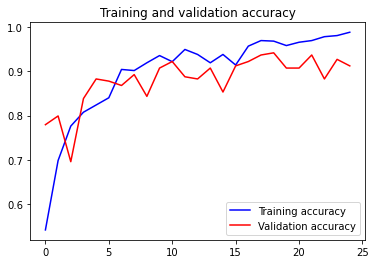

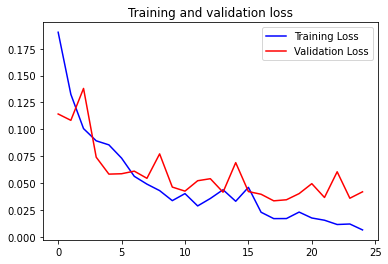

In [96]:
plot_result(history)

We can see that our basic model is already doing a good job. Let's see metrics.

In [97]:
test_labels=test_dataset.classes 
predictions=model.predict_generator(test_dataset, steps=28, verbose=1)
y_pred = np.argmax(predictions, axis=-1)

print(classification_report(test_labels, y_pred))

C:\Users\Lenovo\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


28/28 [==============================] - 2s 63ms/step
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        72
           1       0.86      0.92      0.89        65
           2       0.90      0.90      0.90        68

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



We see that precision of accrodeon class is 97%. From all predicted accordeons we correctly predict 97% of images. I think this is because accordeon images very clear, without noise and with solid background. Meanwhile dombyra has noises and get 86% precision. And we see that accuracy is 91%

#### Complex model

In [111]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation ='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation ='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [112]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 64)       

In [113]:
model2.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['accuracy']
)

In [114]:
%%time
history_complex = model2.fit(train_dataset,
                   steps_per_epoch=50,
                   epochs=25,
                   validation_data=validation_dataset)

Epoch 1/25
50/50 [==============================] - 17s 335ms/step - loss: 0.3356 - accuracy: 0.3552 - val_loss: 0.1770 - val_accuracy: 0.5931
Epoch 2/25
50/50 [==============================] - 16s 321ms/step - loss: 0.1588 - accuracy: 0.5497 - val_loss: 0.1569 - val_accuracy: 0.6716
Epoch 3/25
50/50 [==============================] - 16s 329ms/step - loss: 0.1514 - accuracy: 0.6130 - val_loss: 0.1228 - val_accuracy: 0.6912
Epoch 4/25
50/50 [==============================] - 16s 322ms/step - loss: 0.1357 - accuracy: 0.6766 - val_loss: 0.1400 - val_accuracy: 0.6569
Epoch 5/25
50/50 [==============================] - 17s 336ms/step - loss: 0.1112 - accuracy: 0.7700 - val_loss: 0.1317 - val_accuracy: 0.7059
Epoch 6/25
50/50 [==============================] - 16s 319ms/step - loss: 0.1238 - accuracy: 0.7298 - val_loss: 0.0898 - val_accuracy: 0.8137
Epoch 7/25
50/50 [==============================] - 16s 322ms/step - loss: 0.1013 - accuracy: 0.7829 - val_loss: 0.0789 - val_accuracy: 0.8333

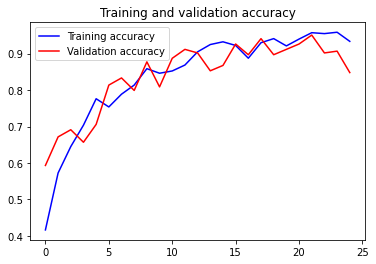

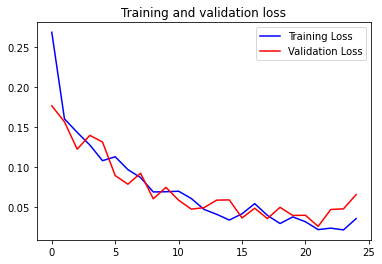

In [115]:
plot_result(history_complex)

As we see results not so much different.

In [116]:
test_labels=test_dataset.classes 
predictions=model2.predict_generator(test_dataset, steps=28, verbose=1)
y_pred = np.argmax(predictions, axis=-1)

print(classification_report(test_labels, y_pred))

C:\Users\Lenovo\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


28/28 [==============================] - 2s 63ms/step
              precision    recall  f1-score   support

           0       0.87      0.94      0.91        72
           1       0.96      0.74      0.83        65
           2       0.78      0.88      0.83        68

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



The situation here is worse than base model. Accuracy is 86% If wee see tot recall of dombyra class(74%) Model get predicted 74% of all dombyra images and predicted it right with 96% precision. I think here is helped regularization, in my case Dropout.

#### VGG 16

In [127]:
VGG16_MODEL=tf.keras.applications.VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

58892288/58889256 [==============================] - 73s 1us/step


In [129]:
VGG16_MODEL.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(len(label_names), activation='softmax')

In [130]:
model3 = tf.keras.Sequential([
  VGG16_MODEL,
  global_average_layer,
  prediction_layer
])

In [131]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [132]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18496)            

In [133]:
history_tl = model.fit(train_dataset,
                   steps_per_epoch=50,
                   epochs=25,
                   validation_data=validation_dataset)

Epoch 1/25
50/50 [==============================] - 15s 275ms/step - loss: 0.1675 - accuracy: 0.9560 - val_loss: 0.2434 - val_accuracy: 0.8971
Epoch 2/25
50/50 [==============================] - 15s 285ms/step - loss: 0.0698 - accuracy: 0.9856 - val_loss: 0.3367 - val_accuracy: 0.8922
Epoch 3/25
50/50 [==============================] - 17s 340ms/step - loss: 0.0632 - accuracy: 0.9913 - val_loss: 0.2154 - val_accuracy: 0.9118
Epoch 4/25
50/50 [==============================] - 17s 341ms/step - loss: 0.0642 - accuracy: 0.9865 - val_loss: 0.1872 - val_accuracy: 0.9216
Epoch 5/25
50/50 [==============================] - 19s 381ms/step - loss: 0.0455 - accuracy: 0.9874 - val_loss: 0.3228 - val_accuracy: 0.8971
Epoch 6/25
50/50 [==============================] - 17s 336ms/step - loss: 0.0377 - accuracy: 0.9920 - val_loss: 0.1891 - val_accuracy: 0.9216
Epoch 7/25
50/50 [==============================] - 16s 319ms/step - loss: 0.0211 - accuracy: 0.9969 - val_loss: 0.2378 - val_accuracy: 0.9363

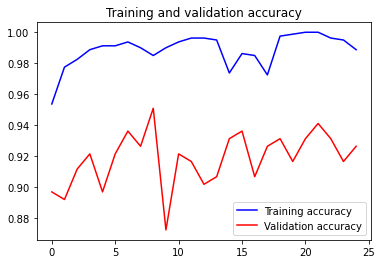

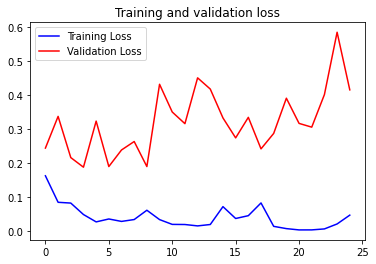

In [134]:
plot_result(history_tl)

According to graphics we see very high accuracy in both case. But in validation we see that loss is bigger than train. Let's see metrics.

In [135]:
test_labels=test_dataset.classes 
predictions=model3.predict_generator(test_dataset, steps=28, verbose=1)
y_pred = np.argmax(predictions, axis=-1)

print(classification_report(test_labels, y_pred))

C:\Users\Lenovo\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


13/28 [============>.................] - ETA: 26sWARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 28 batches). You may need to use the repeat() function when building your dataset.


28/28 [==============================] - 23s 786ms/step
              precision    recall  f1-score   support

           0       0.50      0.07      0.12        72
           1       0.34      0.94      0.50        65
           2       0.67      0.15      0.24        68

    accuracy                           0.37       205
   macro avg       0.50      0.38      0.29       205
weighted avg       0.50      0.37      0.28       205



After seeing metrics, we understand that this model is not good enough. And I can assume that the weights of VGG16 are not suitable for our task, because the model was trained on other objects.

And last thing, I want to see how proportion can change results.

In [143]:
split_data('80_10_10', 0.1, 0.1)

In [144]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [145]:
train_dataset = train.flow_from_directory('80_10_10/train/',
                                          target_size=(150,150),
                                          batch_size=16,
                                          class_mode='categorical'
                                         )

validation_dataset = validation.flow_from_directory('80_10_10/validation/',
                                          target_size=(150,150),
                                          batch_size=16,
                                          class_mode='categorical'
                                         )

test_dataset = test.flow_from_directory('80_10_10/test/',
                                          target_size=(150,150),
                                          batch_size=16,
                                          class_mode='categorical',
                                          shuffle=False
                                         )

Found 3257 images belonging to 3 classes.
Found 407 images belonging to 3 classes.
Found 409 images belonging to 3 classes.


#### Base model

In [146]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation ='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [147]:
model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['accuracy']
)

In [148]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 18496)           

In [149]:
%%time
history = model.fit(train_dataset,
                   steps_per_epoch=50,
                   epochs=25,
                   validation_data=validation_dataset)

Epoch 1/25
50/50 [==============================] - 32s 637ms/step - loss: 0.3563 - accuracy: 0.3229 - val_loss: 0.1612 - val_accuracy: 0.6609
Epoch 2/25
50/50 [==============================] - 27s 541ms/step - loss: 0.1538 - accuracy: 0.6480 - val_loss: 0.1019 - val_accuracy: 0.7862
Epoch 3/25
50/50 [==============================] - 21s 425ms/step - loss: 0.1122 - accuracy: 0.7606 - val_loss: 0.1164 - val_accuracy: 0.7297
Epoch 4/25
50/50 [==============================] - 20s 404ms/step - loss: 0.0944 - accuracy: 0.7935 - val_loss: 0.0740 - val_accuracy: 0.8477
Epoch 5/25
50/50 [==============================] - 18s 368ms/step - loss: 0.0778 - accuracy: 0.8382 - val_loss: 0.0979 - val_accuracy: 0.7764
Epoch 6/25
50/50 [==============================] - 19s 378ms/step - loss: 0.0662 - accuracy: 0.8716 - val_loss: 0.0620 - val_accuracy: 0.8845
Epoch 7/25
50/50 [==============================] - 19s 380ms/step - loss: 0.0647 - accuracy: 0.8669 - val_loss: 0.0597 - val_accuracy: 0.8894

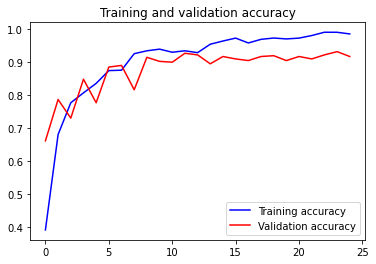

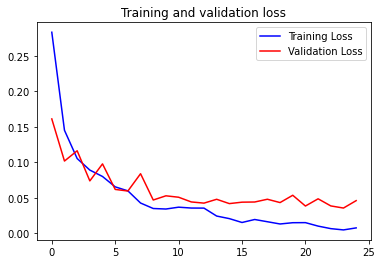

In [150]:
plot_result(history)

In [151]:
test_labels=test_dataset.classes 
predictions=model.predict_generator(test_dataset, steps=28, verbose=1)
y_pred = np.argmax(predictions, axis=-1)

print(classification_report(test_labels, y_pred))

C:\Users\Lenovo\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


26/28 [==========================>...] - ETA: 0sWARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 28 batches). You may need to use the repeat() function when building your dataset.


28/28 [==============================] - 10s 378ms/step
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       144
           1       0.93      0.89      0.91       129
           2       0.89      0.90      0.89       136

    accuracy                           0.92       409
   macro avg       0.92      0.92      0.92       409
weighted avg       0.92      0.92      0.92       409



As we can see metrics almost same, in this partion metrics even better.

#### Complex model

In [152]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation ='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation ='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [153]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 17, 17, 64)      

In [154]:
model2.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['accuracy']
)

In [155]:
%%time
history_complex = model2.fit(train_dataset,
                   steps_per_epoch=50,
                   epochs=25,
                   validation_data=validation_dataset)

Epoch 1/25
50/50 [==============================] - 16s 318ms/step - loss: 0.2151 - accuracy: 0.4243 - val_loss: 0.1901 - val_accuracy: 0.4914
Epoch 2/25
50/50 [==============================] - 16s 327ms/step - loss: 0.1725 - accuracy: 0.5727 - val_loss: 0.1307 - val_accuracy: 0.7002
Epoch 3/25
50/50 [==============================] - 17s 351ms/step - loss: 0.1259 - accuracy: 0.7125 - val_loss: 0.1058 - val_accuracy: 0.7641
Epoch 4/25
50/50 [==============================] - 18s 356ms/step - loss: 0.1301 - accuracy: 0.7168 - val_loss: 0.1321 - val_accuracy: 0.6978
Epoch 5/25
50/50 [==============================] - 18s 356ms/step - loss: 0.1326 - accuracy: 0.6909 - val_loss: 0.0858 - val_accuracy: 0.8329
Epoch 6/25
50/50 [==============================] - 17s 341ms/step - loss: 0.0993 - accuracy: 0.7755 - val_loss: 0.0884 - val_accuracy: 0.8256
Epoch 7/25
50/50 [==============================] - 17s 341ms/step - loss: 0.0735 - accuracy: 0.8366 - val_loss: 0.0829 - val_accuracy: 0.8575

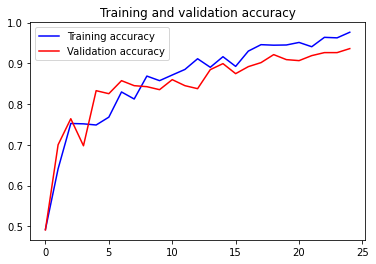

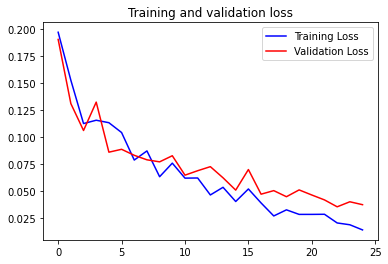

In [156]:
plot_result(history_complex)

As we see results not so much different.

In [157]:
test_labels=test_dataset.classes 
predictions=model2.predict_generator(test_dataset, steps=28, verbose=1)
y_pred = np.argmax(predictions, axis=-1)

print(classification_report(test_labels, y_pred))

26/28 [==========================>...] - ETA: 0sWARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 28 batches). You may need to use the repeat() function when building your dataset.


28/28 [==============================] - 4s 139ms/step
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       144
           1       0.97      0.88      0.92       129
           2       0.88      0.95      0.91       136

    accuracy                           0.93       409
   macro avg       0.93      0.93      0.93       409
weighted avg       0.93      0.93      0.93       409



Here metrics more better than 90-5-5 portion.

To summarize, we get high results. For this taks VGG16 is not good, because VGG16 weights is not for this taks. In Transfer Learning, Task A(Before trained) and Task B(Current task) should have same inputs. I'm sure that exist pre-trained model which can detect music instruments, but I don't search them. Also I cleaned dataset manually and augmented data, I'm sure that very influenced to good results. Experiment with data portion, shows that 80-10-10 is better than 90-5-5. It is depends on how many data we have. For our task, I would rather agree that 80-10-10 is better, but I think that there is not much difference in this case. 